In [28]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../../src/')
from m3_learning.nn.random import random_seed
from m3_learning.viz.style import set_style
from m3_learning.util.file_IO import download_and_unzip
from m3_learning.viz.printing import printer
from m3_learning.viz.layout import layout_fig, labelfigs
from m3_learning.RHEED.AFM import visualize_afm_image, afm_substrate
from m3_learning.RHEED.XRD import plot_xrd, plot_rsm


# from m3_learning.be.dataset import BE_Dataset
printing = printer(basepath = 'Figures/2.AFM_XRD/')

set_style("printing")
random_seed(seed=42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
printing set for seaborn
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42


## Sample 1 - treated_213nm

### Visualize and save the afm figures with colorbar and scalebar

Figures/2.AFM_XRD/treated_213nm-substrate.png
Figures/2.AFM_XRD/treated_213nm-substrate.svg


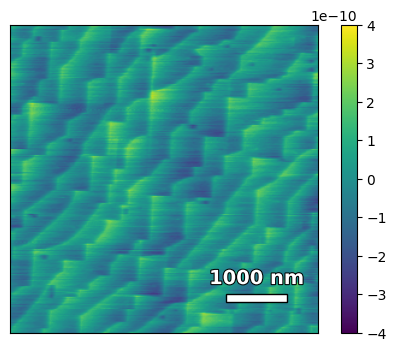

Figures/2.AFM_XRD/treated_213nm-film.png
Figures/2.AFM_XRD/treated_213nm-film.svg


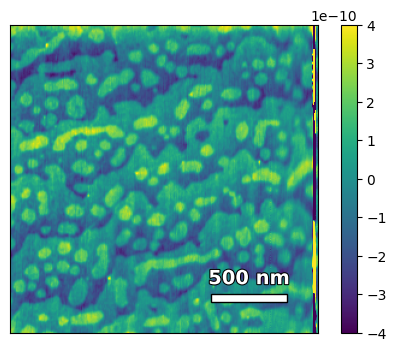

In [2]:
img1 = np.loadtxt('AFM/treated_213nm-substrate.txt')[:256]
scalebar_dict = {'image_size': 5000, 'scale_size': 1000, 'units': 'nm'}
visualize_afm_image(img1, colorbar_range=[-4e-10, 4e-10], figsize=(6,4), scalebar_dict=scalebar_dict, 
                    filename='treated_213nm-substrate', printing=printing)

img2 = np.loadtxt('AFM/treated_213nm-film.txt')[:256]
scalebar_dict = {'image_size': 2008, 'scale_size': 500, 'units': 'nm'}
visualize_afm_image(img2, colorbar_range=[-4e-10, 4e-10], figsize=(6,4), scalebar_dict=scalebar_dict, 
                    filename='treated_213nm-film', printing=printing)

### Calculate the substrate step height, step width, and miscut

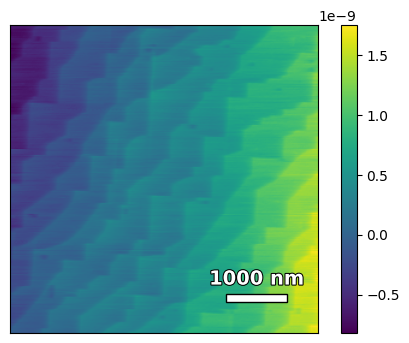

In [3]:
img3 = np.loadtxt('AFM/treated_213nm-substrate-tilted.txt')[:256]

scalebar_dict = {'image_size': 5000, 'scale_size': 1000, 'units': 'nm'}
visualize_afm_image(img3, colorbar_range=None, figsize=(6,4), scalebar_dict=scalebar_dict)

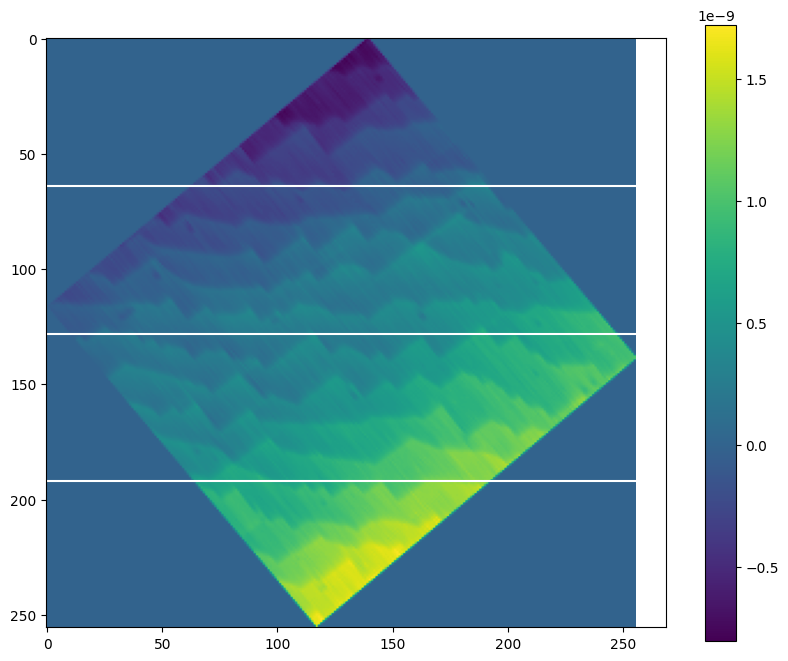

In [4]:
# rotate the angle to make step edges horizontal
analyzer = afm_substrate(img3, pixels=256, size=5e-6)
img_rot, size_rot = analyzer.rotate_image(angle=-50)

#### simple version


In [5]:
x, z, peak_indices, valley_indices = analyzer.slice_rotate(img_rot, size_rot, j=60, prominence=1e-5, width=2, xz_angle=3, demo=True)

In [6]:
# with the provided height from literature
step_heights, step_widths, miscut = analyzer.calculate_simple(x, z, peak_indices, fixed_height=3.91e-10, demo=True)
step_heights, step_widths, miscut = analyzer.calculate_substrate_properties(img_rot, size_rot, xz_angle=3, prominence=1e-3, width=2, style='simple', fixed_height=3.91e-10, std_range=1, demo=False)

Step 1: Height = 3.91e-10, Width = 1.62e-07, Miscut = 0.138°
Step 2: Height = 3.91e-10, Width = 1.40e-07, Miscut = 0.160°
Step 3: Height = 3.91e-10, Width = 1.08e-07, Miscut = 0.208°
Step 4: Height = 3.91e-10, Width = 9.57e-08, Miscut = 0.234°
Step 5: Height = 3.91e-10, Width = 1.94e-07, Miscut = 0.115°
Step 6: Height = 3.91e-10, Width = 1.71e-07, Miscut = 0.131°
Step 7: Height = 3.91e-10, Width = 3.99e-08, Miscut = 0.561°
Step 8: Height = 3.91e-10, Width = 1.23e-07, Miscut = 0.183°
Step 9: Height = 3.91e-10, Width = 2.11e-07, Miscut = 0.106°
Results:
  Average step height = 3.91e-10, Standard deviation = 0.00e+00
  Average step width = 1.38e-07, Standard deviation = 5.03e-08
  Average miscut = 0.204°, Standard deviation = 0.132°
Step height = 3.91e-10 +- 0.00e+00
Step width = 2.13e-07 +- 8.87e-08
Miscut = 0.131° +- 0.074°


In [7]:
# calculate the height from afm figure
step_heights, step_widths, miscut = analyzer.calculate_simple(x, z, peak_indices, demo=True)
step_heights, step_widths, miscut = analyzer.calculate_substrate_properties(img_rot, size_rot, xz_angle=3, prominence=1e-10, width=2, style='simple', std_range=1, demo=False)

Step 1: Height = 1.73e-10, Width = 1.62e-07, Miscut = 0.061°
Step 2: Height = 1.21e-10, Width = 1.40e-07, Miscut = 0.050°
Step 3: Height = -1.00e-10, Width = 1.08e-07, Miscut = -0.053°
Step 4: Height = 1.45e-10, Width = 9.57e-08, Miscut = 0.087°
Step 5: Height = 1.32e-10, Width = 1.94e-07, Miscut = 0.039°
Step 6: Height = 8.74e-11, Width = 1.71e-07, Miscut = 0.029°
Step 7: Height = 1.63e-11, Width = 3.99e-08, Miscut = 0.023°
Step 8: Height = 2.25e-11, Width = 1.23e-07, Miscut = 0.011°
Step 9: Height = 1.05e-10, Width = 2.11e-07, Miscut = 0.029°
Results:
  Average step height = 7.79e-11, Standard deviation = 8.01e-11
  Average step width = 1.38e-07, Standard deviation = 5.03e-08
  Average miscut = 0.031°, Standard deviation = 0.037°
Step height = 1.50e-10 +- 1.28e-10
Step width = 2.13e-07 +- 8.87e-08
Miscut = 0.042° +- 0.038°



### calculate fit version


In [8]:
x, z, peak_indices, valley_indices = analyzer.slice_rotate(img_rot, size_rot, j=100, prominence=1e-11, width=2, xz_angle=0, demo=True)
step_heights, step_widths, miscut = analyzer.calculate_fit(x, z, peak_indices, valley_indices, fixed_height=3.91e-10, demo=True)

step 1: step_width: 1.10e-10, left_peak: (4.99e-07, -4.60e-10), valley: (5.41e-07, -5.11e-10), right_peak: (6.93e-07, -2.94e-10)
step 2: step_width: 4.97e-10, left_peak: (6.93e-07, -2.94e-10), valley: (8.18e-07, -3.74e-10), right_peak: (8.87e-07, -1.42e-10)
step 3: step_width: 2.44e-10, left_peak: (9.57e-07, -1.84e-10), valley: (1.03e-06, -2.97e-10), right_peak: (1.15e-06, -6.09e-11)
step 4: step_width: 2.04e-10, left_peak: (1.33e-06, 1.19e-10), valley: (1.40e-06, 2.98e-11), right_peak: (1.52e-06, 2.37e-10)
step 5: step_width: 2.84e-10, left_peak: (1.52e-06, 2.37e-10), valley: (1.58e-06, 1.46e-10), right_peak: (1.65e-06, 3.88e-10)
step 6: step_width: 3.97e-10, left_peak: (1.73e-06, 2.83e-10), valley: (1.87e-06, 1.73e-10), right_peak: (1.97e-06, 3.74e-10)
step 7: step_width: 5.13e-10, left_peak: (1.97e-06, 3.74e-10), valley: (2.11e-06, 1.85e-10), right_peak: (2.19e-06, 3.79e-10)
step 8: step_width: 2.68e-10, left_peak: (2.19e-06, 3.79e-10), valley: (2.26e-06, 3.16e-10), right_peak: (2.3

The "simple" method with provided step height gives a more accurate results for the step width and miscut: 

    Step height = 3.91e-10 +- 0.00e+00
    Step width = 2.13e-07 +- 8.87e-08
    Miscut = 0.131° +- 0.074°

## Sample 2 - treated_81nm:

Figures/2.AFM_XRD/treated_81nm-substrate.png
Figures/2.AFM_XRD/treated_81nm-substrate.svg


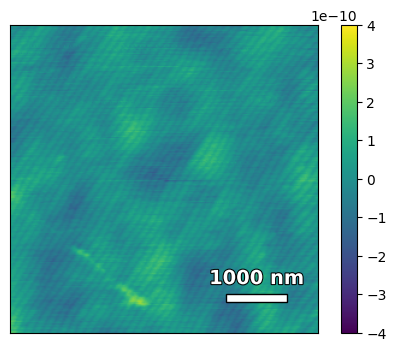

Figures/2.AFM_XRD/treated_81nm-film.png
Figures/2.AFM_XRD/treated_81nm-film.svg


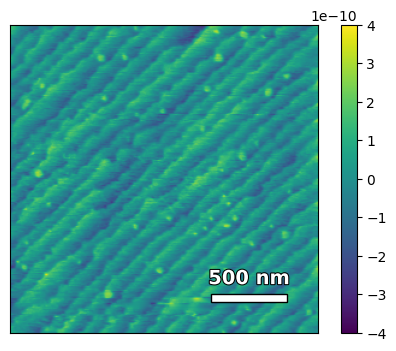

In [9]:
img1 = np.loadtxt('AFM/treated_81nm-substrate.txt')[:256]
scalebar_dict = {'image_size': 5000, 'scale_size': 1000, 'units': 'nm'}
visualize_afm_image(img1, colorbar_range=[-4e-10, 4e-10], figsize=(6,4), scalebar_dict=scalebar_dict, 
                    filename='treated_81nm-substrate', printing=printing)

img2 = np.loadtxt('AFM/treated_81nm-film.txt')[:256]
scalebar_dict = {'image_size': 2008, 'scale_size': 500, 'units': 'nm'}
visualize_afm_image(img2, colorbar_range=[-4e-10, 4e-10], figsize=(6,4), scalebar_dict=scalebar_dict, 
                    filename='treated_81nm-film', printing=printing)

### Calculate the substrate step height, step width, and miscut

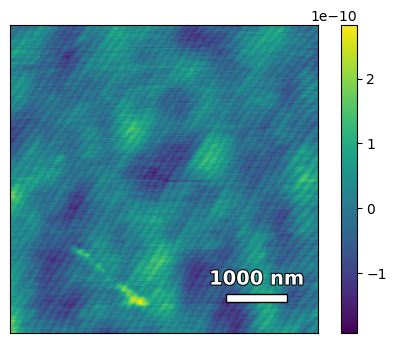

In [10]:
img3 = np.loadtxt('AFM/treated_81nm-substrate.txt')[:256]

scalebar_dict = {'image_size': 5000, 'scale_size': 1000, 'units': 'nm'}
visualize_afm_image(img3, colorbar_range=None, figsize=(6,4), scalebar_dict=scalebar_dict)

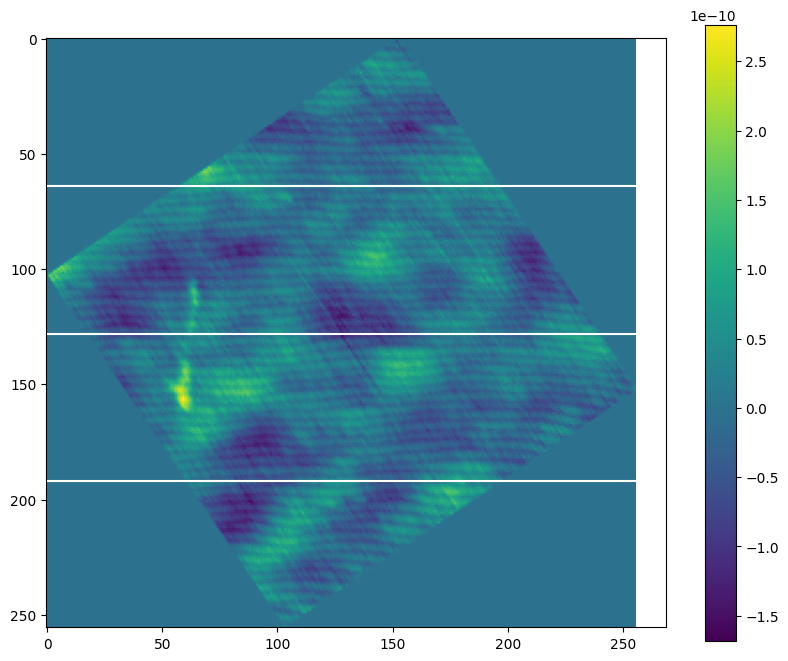

In [11]:
# rotate the angle to make step edges horizontal
analyzer = afm_substrate(img3, pixels=256, size=5e-6)
img_rot, size_rot = analyzer.rotate_image(angle=-56)

#### simple version


In [12]:
prominence = 1e-13
width = 1.5
xz_angle = 0
x, z, peak_indices, valley_indices = analyzer.slice_rotate(img_rot, size_rot, j=60, prominence=prominence, width=width, xz_angle=xz_angle, demo=True)

In [13]:
# with the provided height from literature
step_heights, step_widths, miscut = analyzer.calculate_simple(x, z, peak_indices, fixed_height=3.91e-5, demo=True)
step_heights, step_widths, miscut = analyzer.calculate_substrate_properties(img_rot, size_rot, xz_angle=xz_angle, prominence=prominence, width=width, 
                                                    style='simple', fixed_height=3.91e-10, std_range=1, demo=False)


Step 1: Height = 3.91e-05, Width = 1.69e-07, Miscut = 89.753°
Step 2: Height = 3.91e-05, Width = 5.63e-08, Miscut = 89.918°
Step 3: Height = 3.91e-05, Width = 5.63e-08, Miscut = 89.918°
Step 4: Height = 3.91e-05, Width = 9.85e-08, Miscut = 89.856°
Step 5: Height = 3.91e-05, Width = 5.63e-08, Miscut = 89.918°
Step 6: Height = 3.91e-05, Width = 1.13e-07, Miscut = 89.835°
Step 7: Height = 3.91e-05, Width = 5.63e-08, Miscut = 89.918°
Step 8: Height = 3.91e-05, Width = 8.44e-08, Miscut = 89.876°
Step 9: Height = 3.91e-05, Width = 1.13e-07, Miscut = 89.835°
Step 10: Height = 3.91e-05, Width = 5.63e-08, Miscut = 89.918°
Step 11: Height = 3.91e-05, Width = 1.27e-07, Miscut = 89.814°
Step 12: Height = 3.91e-05, Width = 1.69e-07, Miscut = 89.753°
Step 13: Height = 3.91e-05, Width = 1.69e-07, Miscut = 89.753°
Step 14: Height = 3.91e-05, Width = 1.27e-07, Miscut = 89.814°
Step 15: Height = 3.91e-05, Width = 5.63e-08, Miscut = 89.918°
Step 16: Height = 3.91e-05, Width = 5.63e-08, Miscut = 89.918°
S

In [14]:
# calculate the height from afm figure
step_heights, step_widths, miscut = analyzer.calculate_simple(x, z, peak_indices, demo=True)
step_heights, step_widths, miscut = analyzer.calculate_substrate_properties(img_rot, size_rot, xz_angle=2, prominence=1e-2, width=1.5, style='simple', std_range=1, demo=False)


Step 1: Height = -4.61e-11, Width = 1.69e-07, Miscut = -0.016°
Step 2: Height = -1.44e-11, Width = 5.63e-08, Miscut = -0.015°
Step 3: Height = -2.18e-11, Width = 5.63e-08, Miscut = -0.022°
Step 4: Height = -3.33e-11, Width = 9.85e-08, Miscut = -0.019°
Step 5: Height = -6.26e-12, Width = 5.63e-08, Miscut = -0.006°
Step 6: Height = -2.23e-11, Width = 1.13e-07, Miscut = -0.011°
Step 7: Height = 1.97e-11, Width = 5.63e-08, Miscut = 0.020°
Step 8: Height = 3.62e-11, Width = 8.44e-08, Miscut = 0.025°
Step 9: Height = 1.46e-11, Width = 1.13e-07, Miscut = 0.007°
Step 10: Height = 5.60e-11, Width = 5.63e-08, Miscut = 0.057°
Step 11: Height = 1.11e-11, Width = 1.27e-07, Miscut = 0.005°
Step 12: Height = 1.05e-10, Width = 1.69e-07, Miscut = 0.036°
Step 13: Height = 6.57e-11, Width = 1.69e-07, Miscut = 0.022°
Step 14: Height = -1.67e-10, Width = 1.27e-07, Miscut = -0.076°
Step 15: Height = -4.48e-12, Width = 5.63e-08, Miscut = -0.005°
Step 16: Height = -1.28e-12, Width = 5.63e-08, Miscut = -0.001°

#### calculate fit version

In [15]:
x, z, peak_indices, valley_indices = analyzer.slice_rotate(img_rot, size_rot, j=100, prominence=1e-13, width=1, xz_angle=0, demo=True)
step_heights, step_widths, miscut = analyzer.calculate_fit(x, z, peak_indices, valley_indices, fixed_height=3.91e-10, demo=True)

step 1: step_width: 4.33e-11, left_peak: (5.35e-07, -7.14e-11), valley: (5.49e-07, -9.73e-11), right_peak: (5.91e-07, -4.48e-11)
step 2: step_width: 3.45e-11, left_peak: (6.75e-07, 7.57e-12), valley: (6.89e-07, -8.11e-12), right_peak: (7.46e-07, 6.73e-11)
step 3: step_width: 1.00e-10, left_peak: (7.46e-07, 6.73e-11), valley: (7.74e-07, 1.30e-11), right_peak: (7.88e-07, 3.60e-11)
step 4: step_width: 6.81e-11, left_peak: (7.88e-07, 3.60e-11), valley: (8.16e-07, -4.68e-12), right_peak: (8.44e-07, 2.27e-11)
step 5: step_width: 7.35e-11, left_peak: (8.44e-07, 2.27e-11), valley: (8.72e-07, -1.13e-11), right_peak: (9.14e-07, 4.78e-11)
step 6: step_width: 4.25e-11, left_peak: (9.14e-07, 4.78e-11), valley: (9.29e-07, 2.03e-11), right_peak: (9.71e-07, 6.54e-11)
step 7: step_width: 6.54e-11, left_peak: (9.71e-07, 6.54e-11), valley: (9.99e-07, 1.68e-11), right_peak: (1.03e-06, 3.35e-11)
step 10: step_width: 1.13e-10, left_peak: (1.17e-06, -4.47e-12), valley: (1.21e-06, -4.84e-11), right_peak: (1.2

In [16]:
# with the provided height from literature
step_heights, step_widths, miscut = analyzer.calculate_substrate_properties(img_rot, size_rot, xz_angle=0, prominence=1e-13, width=1, style='fit', fixed_height=3.91e-10, std_range=1, demo=False)

Step height = 3.91e-10 +- 0.00e+00
Step width = 8.55e-11 +- 4.62e-11
Miscut = 77.852° +- 5.976°


The "simple" method with provided step height gives a more accurate results for the step width and miscut: 

    Step height = 3.91e-10 +- 5.17e-26
    Step width = 8.07e-08 +- 4.39e-08
    Miscut = 0.330° +- 0.113°

## Sample 3

### Visualize and save the afm figures with colorbar and scalebar

Figures/2.AFM_XRD/untreated_162nm-substrate.png
Figures/2.AFM_XRD/untreated_162nm-substrate.svg


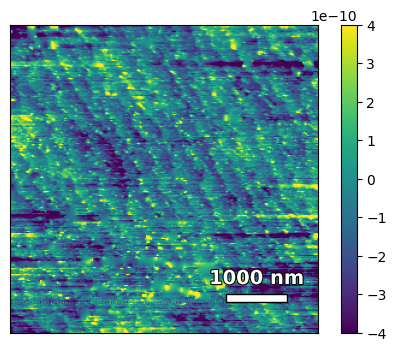

Figures/2.AFM_XRD/untreated_162nm-film.png
Figures/2.AFM_XRD/untreated_162nm-film.svg


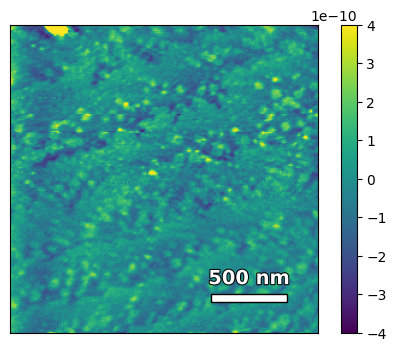

In [17]:
img1 = np.loadtxt('AFM/untreated_162nm-substrate.txt')[:256]
img1 = np.rot90(img1, k=2)
scalebar_dict = {'image_size': 5000, 'scale_size': 1000, 'units': 'nm'}
visualize_afm_image(img1, colorbar_range=[-4e-10, 4e-10], figsize=(6,4), 
                    scalebar_dict=scalebar_dict, filename='untreated_162nm-substrate', printing=printing)

img2 = np.loadtxt('AFM/untreated_162nm-film.txt')[:256]
scalebar_dict = {'image_size': 2008, 'scale_size': 500, 'units': 'nm'}
visualize_afm_image(img2, colorbar_range=[-4e-10, 4e-10], figsize=(6,4), 
                    scalebar_dict=scalebar_dict, filename='untreated_162nm-film', printing=printing)

### Calculate the substrate step height, step width, and miscut

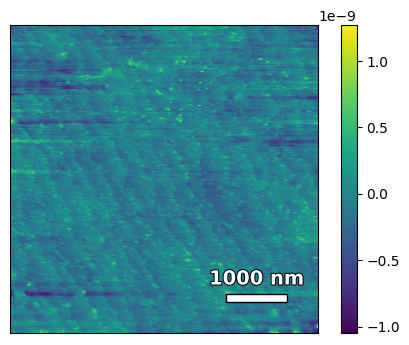

In [18]:
img3 = np.loadtxt('AFM/untreated_162nm-substrate-tilted.txt')[:256]

scalebar_dict = {'image_size': 5000, 'scale_size': 1000, 'units': 'nm'}
visualize_afm_image(img3, colorbar_range=None, figsize=(6,4), scalebar_dict=scalebar_dict)

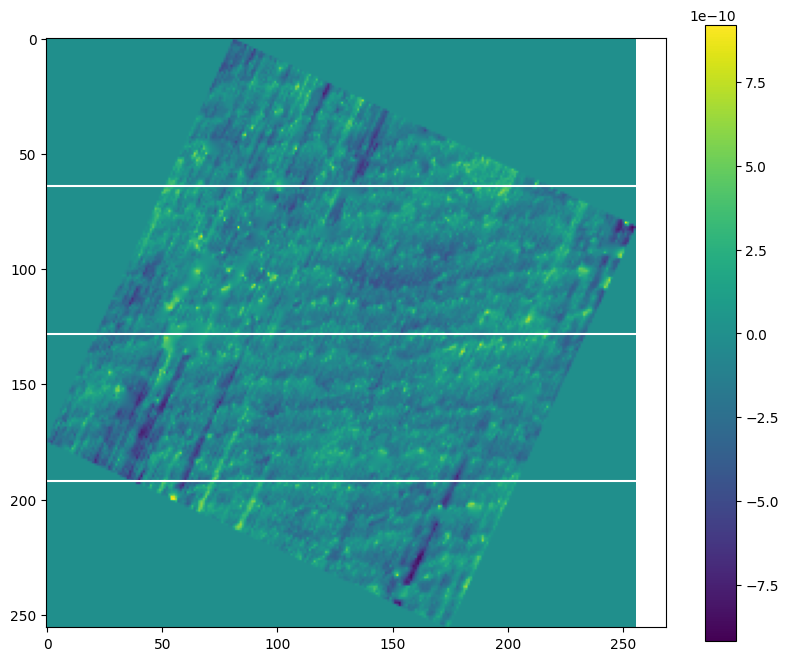

In [19]:
# rotate the angle to make step edges horizontal
analyzer = afm_substrate(img3, pixels=256, size=5e-6)
img_rot, size_rot = analyzer.rotate_image(angle=65)

#### simple version


In [20]:
x, z, peak_indices, valley_indices = analyzer.slice_rotate(img_rot, size_rot, j=60, prominence=1e-13, width=2, xz_angle=2, demo=True)

In [21]:
# with the provided height from literature
step_heights, step_widths, miscut = analyzer.calculate_simple(x, z, peak_indices, fixed_height=3.91e-10/2, demo=True)
step_heights, step_widths, miscut = analyzer.calculate_substrate_properties(img_rot, size_rot, xz_angle=2, prominence=1e-13, width=2, style='simple', fixed_height=3.91e-10/2, std_range=1, demo=False)

Step 1: Height = 1.95e-10, Width = 9.41e-08, Miscut = 0.119°
Step 2: Height = 1.95e-10, Width = 9.42e-08, Miscut = 0.119°
Step 3: Height = 1.95e-10, Width = 2.48e-07, Miscut = 0.045°
Step 4: Height = 1.95e-10, Width = 1.30e-07, Miscut = 0.086°
Step 5: Height = 1.95e-10, Width = 1.03e-07, Miscut = 0.109°
Step 6: Height = 1.95e-10, Width = 1.40e-07, Miscut = 0.080°
Step 7: Height = 1.95e-10, Width = 1.09e-07, Miscut = 0.103°
Step 8: Height = 1.95e-10, Width = 1.50e-07, Miscut = 0.075°
Step 9: Height = 1.95e-10, Width = 1.44e-07, Miscut = 0.078°
Step 10: Height = 1.95e-10, Width = 1.47e-07, Miscut = 0.076°
Step 11: Height = 1.95e-10, Width = 1.51e-07, Miscut = 0.074°
Step 12: Height = 1.95e-10, Width = 1.64e-07, Miscut = 0.068°
Step 13: Height = 1.95e-10, Width = 1.29e-07, Miscut = 0.087°
Results:
  Average step height = 1.95e-10, Standard deviation = 0.00e+00
  Average step width = 1.39e-07, Standard deviation = 3.84e-08
  Average miscut = 0.086°, Standard deviation = 0.020°
Step height 

In [22]:
# calculate the height from afm figure
step_heights, step_widths, miscut = analyzer.calculate_simple(x, z, peak_indices, demo=True)
step_heights, step_widths, miscut = analyzer.calculate_substrate_properties(img_rot, size_rot, xz_angle=2, prominence=1e-13, width=2, style='simple', std_range=1, demo=False)

Step 1: Height = 1.17e-10, Width = 9.41e-08, Miscut = 0.071°
Step 2: Height = -7.96e-11, Width = 9.42e-08, Miscut = -0.048°
Step 3: Height = 3.26e-11, Width = 2.48e-07, Miscut = 0.008°
Step 4: Height = -1.59e-10, Width = 1.30e-07, Miscut = -0.070°
Step 5: Height = 3.95e-10, Width = 1.03e-07, Miscut = 0.221°
Step 6: Height = -2.97e-10, Width = 1.40e-07, Miscut = -0.121°
Step 7: Height = 1.14e-10, Width = 1.09e-07, Miscut = 0.060°
Step 8: Height = 1.53e-10, Width = 1.50e-07, Miscut = 0.058°
Step 9: Height = -3.56e-10, Width = 1.44e-07, Miscut = -0.141°
Step 10: Height = -1.48e-12, Width = 1.47e-07, Miscut = -0.001°
Step 11: Height = -4.59e-11, Width = 1.51e-07, Miscut = -0.017°
Step 12: Height = -3.21e-11, Width = 1.64e-07, Miscut = -0.011°
Step 13: Height = 3.85e-11, Width = 1.29e-07, Miscut = 0.017°
Results:
  Average step height = -9.24e-12, Standard deviation = 1.88e-10
  Average step width = 1.39e-07, Standard deviation = 3.84e-08
  Average miscut = 0.002°, Standard deviation = 0.08

#### calculate fit version

In [23]:
x, z, peak_indices, valley_indices = analyzer.slice_rotate(img_rot, size_rot, j=100, prominence=1e-10, width=1, xz_angle=0, demo=True)
step_heights, step_widths, miscut = analyzer.calculate_fit(x, z, peak_indices, valley_indices, fixed_height=3.91e-10/2, demo=True)

step 0: step_width: 2.91e-09, left_peak: (1.62e-07, 1.37e-10), valley: (2.79e-07, -7.53e-11), right_peak: (2.94e-07, 2.61e-10)
step 1: step_width: 6.61e-10, left_peak: (2.94e-07, 2.61e-10), valley: (3.53e-07, -1.69e-10), right_peak: (4.70e-07, 2.93e-10)
step 2: step_width: 7.06e-10, left_peak: (4.70e-07, 2.93e-10), valley: (5.44e-07, -1.95e-10), right_peak: (5.88e-07, -6.45e-11)
step 3: step_width: 3.13e-10, left_peak: (5.88e-07, -6.45e-11), valley: (6.17e-07, -1.77e-10), right_peak: (6.47e-07, 2.45e-11)
step 4: step_width: 2.24e-10, left_peak: (6.47e-07, 2.45e-11), valley: (6.61e-07, -1.39e-10), right_peak: (7.20e-07, 1.04e-10)
step 5: step_width: 4.08e-10, left_peak: (7.20e-07, 1.04e-10), valley: (7.79e-07, -6.47e-11), right_peak: (8.23e-07, 1.15e-10)
step 6: step_width: 3.86e-10, left_peak: (8.23e-07, 1.15e-10), valley: (8.52e-07, -1.05e-10), right_peak: (9.26e-07, 3.10e-10)
step 7: step_width: 2.25e-09, left_peak: (9.26e-07, 3.10e-10), valley: (1.01e-06, -5.36e-10), right_peak: (1.

In [24]:
# with the provided height from literature
step_heights, step_widths, miscut = analyzer.calculate_substrate_properties(img_rot, size_rot, xz_angle=0, prominence=1e-10, width=1, 
style='fit', fixed_height=3.91e-10/2, std_range=1, demo=False)

Step height = 1.95e-10 +- 2.58e-26
Step width = 8.41e-10 +- 5.97e-10
Miscut = 18.522° +- 10.322°


The "simple" method with provided step height gives a more accurate results for the step width and miscut: 

    Step height = 1.95e-10 +- 0.00e+00
    Step width = 1.62e-07 +- 8.27e-08
    Miscut = 0.090° +- 0.135°

## XRD and RSM for 3 samples and substrate

Figures/2.AFM_XRD/XRD_42_49-stacked.png
Figures/2.AFM_XRD/XRD_42_49-stacked.svg


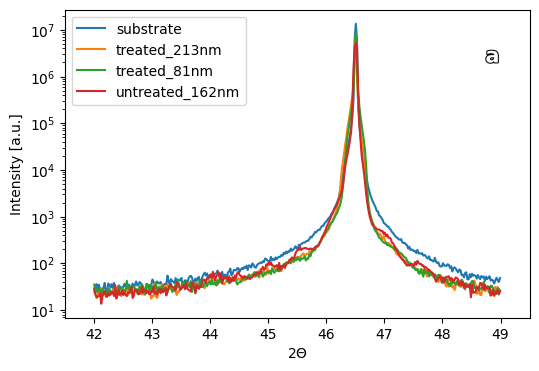

Figures/2.AFM_XRD/XRD_42_49-spacing.png
Figures/2.AFM_XRD/XRD_42_49-spacing.svg


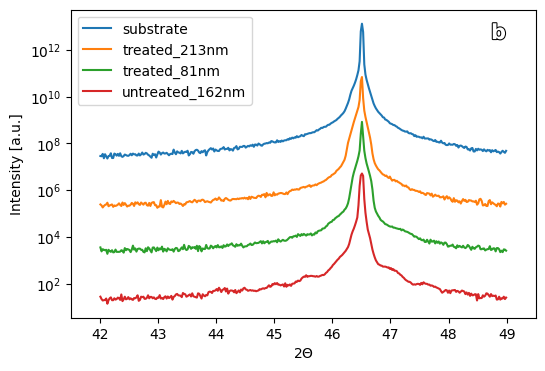

In [44]:
files = ['./XRD/substrate-XRD_42_49.xrdml',
         './XRD/treated_213nm-XRD_42_29.xrdml',
         './XRD/treated_81nm-XRD_42_29.xrdml',
         './XRD/untreated_162nm-XRD_42_29.xrdml']
labels = ['substrate', 'treated_213nm', 'treated_81nm', 'untreated_162nm']

fig, ax = plt.subplots(figsize=(6,4))
plot_xrd(ax, files, labels, diff=None, xrange=(41.5, 49.5))
labelfigs(ax, 0, loc='tl', size=15)
printing.savefig(fig, 'XRD_42_49-stacked')
plt.show() 

fig, ax = plt.subplots(figsize=(6,4))
plot_xrd(ax, files, labels, diff=1e2, xrange=(41.5, 49.5))
labelfigs(ax, 1, loc='tl', size=15)
printing.savefig(fig, 'XRD_42_49-spacing') 
plt.show() 

Figures/2.AFM_XRD/RSM_103.png
Figures/2.AFM_XRD/RSM_103.svg


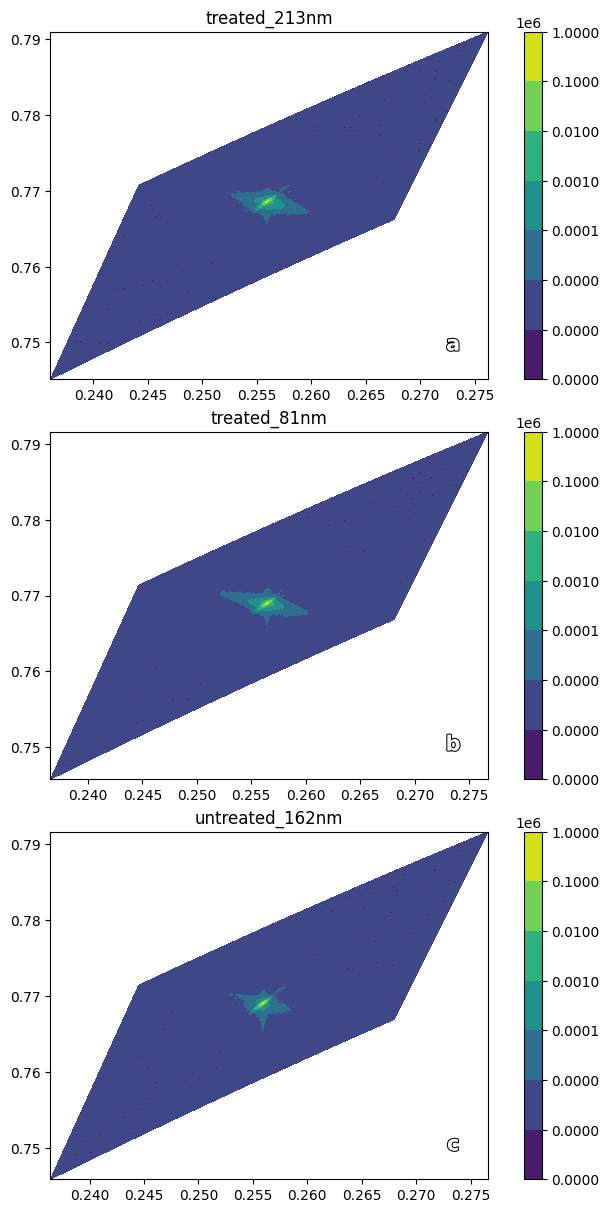

In [47]:
files = ['./XRD/treated_213nm-RSM_103.xrdml',
         './XRD/treated_81nm-RSM_103.xrdml',
         './XRD/untreated_162nm-RSM_103.xrdml']
titles = ['treated_213nm', 'treated_81nm', 'untreated_162nm']

fig, axes = layout_fig(3, 1, figsize=(6,12))
for i, ax in enumerate(axes):
    plot_rsm(ax, files[i], title=titles[i])
    labelfigs(ax, i, loc='tl', size=15)
    
printing.savefig(fig, 'RSM_103')
plt.show()